In [2]:
import FinanceDataReader as fdr
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import bs4
import pandas as pd
import numpy as np
import time
import datetime
import os
import warnings
warnings.filterwarnings('ignore')
import json
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import pickle
import timeit
from IPython.display import clear_output
import glob

pd.options.display.float_format = '{:,.3f}'.format

- #### 가설 - 위 꼬리가 긴 양봉이 자주 발생한다.

위 꼬리 양봉의 수는 아주 많거나, 몇 개 없을 때 좋은 수익율을 보여줍니다. 윗 꼬리가 긴 양봉이 많이 발생하면 수익율이 좋습니다. 하지만, 윗 꼬리 양봉이 3 개 이하로 일봉이 나타나도 수익율은 좋습니다. 따라서 가설은 반은 맞고, 반은 틀리다고 할 수 있습니다. 

단조 감소나 단조 증가 형태가 아닌 오목한 형태의 막대그래프 흐름이 만들어 졌습니다. 선형모형은 입력변수와 타겟변수와의 선형적인 상관관계를 기본으로 하고 있습니다. 따라서, 단조 증가나 단조 감소형태의 모양이 좋은데요. 이 변수를 선형모형에 활용하기 위해서는 1 오분위 막대와 5 오분위 막대를 합하고, 나머지 막대를 합하여, 2 개의 막대로 다시 표현하면 좋습니다. 두 번째 그래프는 어떻게 데이터를 변경하는 지 보여줍니다. 선형모형으로 모델을 구현할 때는 새로게 생성된 'x_num_toptail' 를 이용하는 것이 좋습니다. 


               count  mean
ranks                     
(-0.001, 3.0]    149 0.544
(3.0, 5.0]        83 0.434
(5.0, 7.0]        97 0.423
(7.0, 12.0]       96 0.333
(12.0, 19.0]      96 0.521


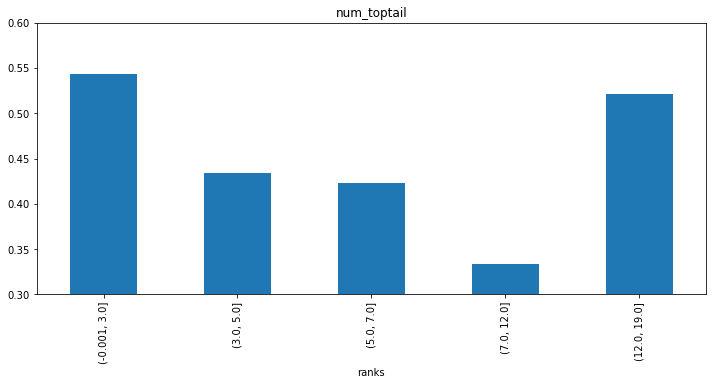

In [25]:
var = 'num_toptail'
model_data = pd.read_pickle('model_data.pkl')
model_data['target'] = np.where(model_data['return']>1, 1, 0)
model_data['ranks'] = pd.qcut(model_data[var], q = 5)
print(model_data.groupby('ranks')['target'].agg(['count', 'mean']))
model_data.groupby('ranks')['target'].mean().plot(kind='bar', figsize=(12,5), ylim=(0.3, 0.6))
plt.title(var)
plt.show()

               count  mean
x_num_toptail             
0                258 0.407
1                263 0.513


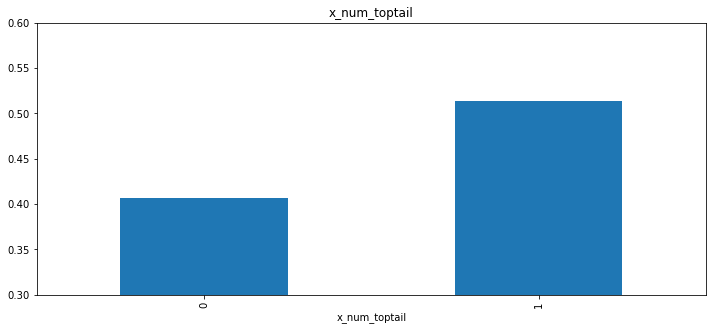

In [29]:
def div(x):
    if (x <= 3) or (x >= 12):
        return 1
    else:
        return 0

var = 'x_num_toptail'    
model_data[var] = model_data['num_toptail'].apply(div)    
print(model_data.groupby(var)['target'].agg(['count', 'mean']))
model_data.groupby(var)['target'].mean().plot(kind='bar', figsize=(12,5), ylim=(0.3, 0.6))
plt.title(var)
plt.show()